**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [2]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [38]:
np.random.seed(3)
x = np.linspace(5,100,15)
y=line(3,x,errors=errors)

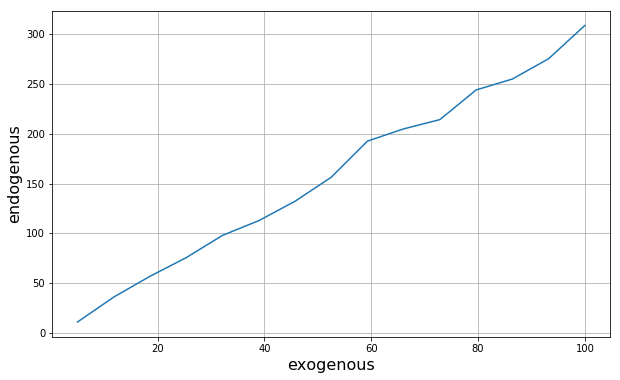

In [39]:
plt.figure(figsize=(10,6))
plt.grid(b=True)
pl.plot(x,y)

pl.ylabel("endogenous", fontsize=16)
pl.xlabel("exogenous", fontsize=16)

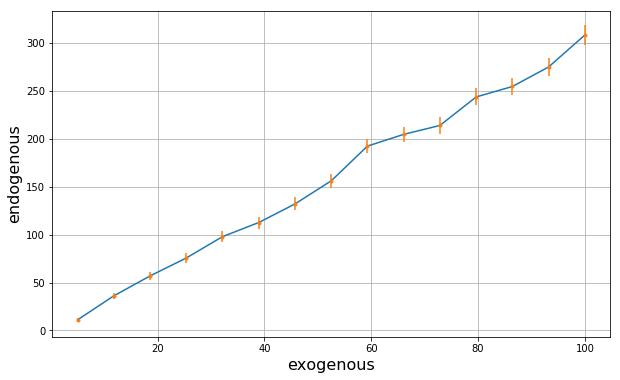

In [40]:
plt.figure(figsize=(10,6))
plt.grid(b=True)
pl.plot(x,y)
pl.errorbar(x, y, errors(x),  fmt='.')
pl.ylabel("endogenous", fontsize=16)
pl.xlabel("exogenous", fontsize=16)


# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [27]:
print("y:", y)

y: [  11.10005092   36.13215093   56.95125171   75.68146783   97.99373269
  112.74009946  132.15668478  156.28207153  192.55804294  204.8374514
  214.13296638  243.91468713  254.83850308  275.22811647  308.59284008]


In [28]:
print("x:",x)

x: [   5.           11.78571429   18.57142857   25.35714286   32.14285714
   38.92857143   45.71428571   52.5          59.28571429   66.07142857
   72.85714286   79.64285714   86.42857143   93.21428571  100.        ]


In [29]:
x_c = sm.add_constant(x)

In [30]:
print('result of applying statsmodels.api.add_constant() to x:', x_c)

result of applying statsmodels.api.add_constant() to x: [[   1.            5.        ]
 [   1.           11.78571429]
 [   1.           18.57142857]
 [   1.           25.35714286]
 [   1.           32.14285714]
 [   1.           38.92857143]
 [   1.           45.71428571]
 [   1.           52.5       ]
 [   1.           59.28571429]
 [   1.           66.07142857]
 [   1.           72.85714286]
 [   1.           79.64285714]
 [   1.           86.42857143]
 [   1.           93.21428571]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

### a. wrong way

In [31]:
ols = smf.OLS(y, x).fit()
ols.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+04
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.26e-22
Time:                        23:20:38   Log-Likelihood:                -46.958
No. Observations:                  15   AIC:                             95.92
Df Residuals:                      14   BIC:                             96.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.0194      0.025    122.675      0.000         2.967     3.072
==============================================================================
Omnibus:                        4.035   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                2.171
Skew:                           0.924   Prob(JB):                        0.338
Kurtosis:                       3.235   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### right way

In [32]:
lm = sm.OLS(y, sm.add_constant(x)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3407.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.04e-17
Time:                        23:21:40   Log-Likelihood:                -46.860
No. Observations:                  15   AIC:                             97.72
Df Residuals:                      13   BIC:                             99.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.2914      3.130     -0.413      0.687        -8.053     5.470
x1             3.0381      0.052     58.372      0.000         2.926     3.151
==============================================================================
Omnibus:                        3.222   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                1.599
Skew:                           0.793   Prob(JB):                        0.450
Kurtosis:                       3.211   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### discuss the differences

by passing statsmodels.api.add_constant(x) as exogenous variable, the result has a constant which is the intercept of the linear model.

# 4. plot the data (as points) and both statsmodels fits

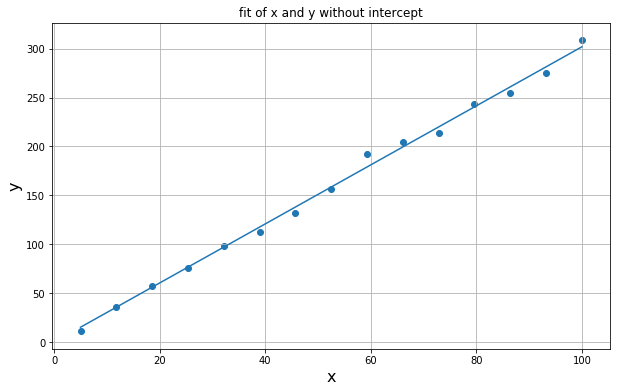

In [44]:
plt.figure(figsize=(10,6))
plt.title('fit of x and y without intercept')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid()
pred = ols.predict() 
plt.plot(x, pred)
plt.scatter(x, y)

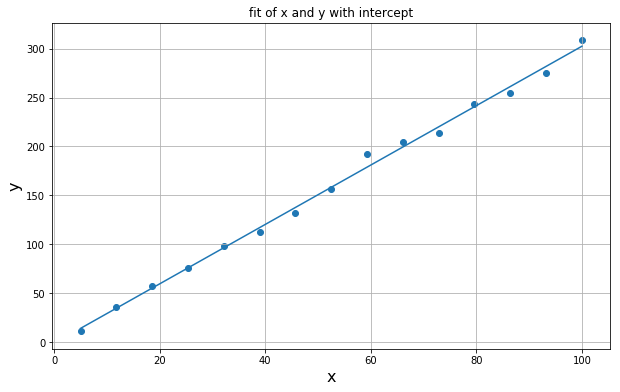

In [45]:
plt.figure(figsize=(10,6))
plt.title('fit of x and y with intercept')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid()
pred = lm.predict() 
plt.plot(x, pred)
plt.scatter(x, y)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [46]:
x = np.linspace(0, 100, 10)
y =line(2, x, b=111, errors=errors)

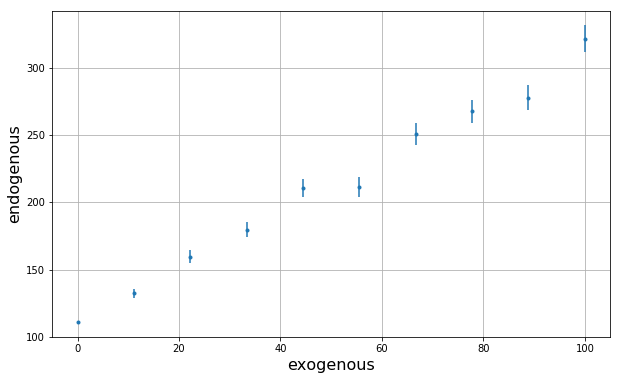

In [47]:
plt.figure(figsize=(10,6))
plt.grid()
pl.errorbar(x, y, errors(x),  fmt='.')
pl.ylabel("endogenous", fontsize=16)
pl.xlabel("exogenous", fontsize=16)

# 6. repeat step 3

In [51]:
ols = smf.OLS(y, x).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.34e-06
Time:                        23:37:38   Log-Likelihood:                -55.268
No. Observations:                  10   AIC:                             112.5
Df Residuals:                       9   BIC:                             112.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.5956      0.342     10.521      0.000         2.823     4.369
==============================================================================
Omnibus:                        1.583   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                0.750
Skew:                          -0.025   Prob(JB):                        0.687
Kurtosis:                       1.659   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
lm = sm.OLS(y, sm.add_constant(x)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     641.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           6.33e-09
Time:                        23:37:38   Log-Likelihood:                -33.832
No. Observations:                  10   AIC:                             71.66
Df Residuals:                       8   BIC:                             72.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        112.2518      4.685     23.959      0.000       101.448   123.056
x1             2.0004      0.079     25.327      0.000         1.818     2.183
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   2.923
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.566
Skew:                          -0.456   Prob(JB):                        0.753
Kurtosis:                       2.273   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

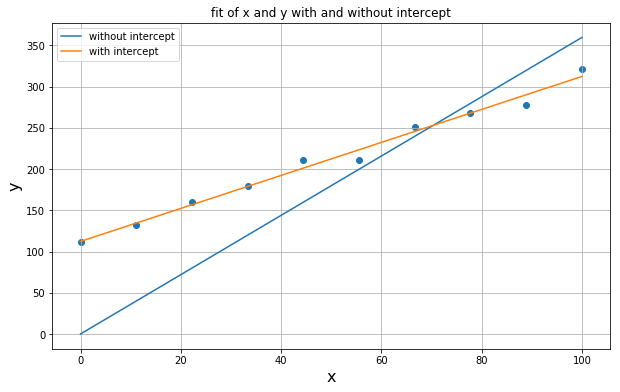

In [62]:
pl.figure(figsize=(10,6))
pl.title('fit of x and y with and without intercept')
pl.xlabel('x', fontsize=16)
pl.ylabel('y', fontsize=16)
pl.grid()
pred1 = ols.predict() 
pred2 = lm.predict() 
pl.plot(x, pred1,label="without intercept")
pl.plot(x, pred2,label="with intercept")
pl.legend()
pl.scatter(x, y)

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [67]:
weights=1/errors(y)
rm = sm.WLS(y, x,weights).fit()
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.904
Model:                            WLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     85.01
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.00e-06
Time:                        23:44:48   Log-Likelihood:                -56.083
No. Observations:                  10   AIC:                             114.2
Df Residuals:                       9   BIC:                             114.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.6575      0.397      9.220      0.000         2.760     4.555
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.697
Skew:                           0.171   Prob(JB):                        0.706
Kurtosis:                       1.753   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

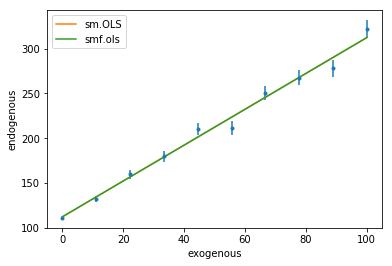

In [68]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, lm.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();